## **`Assigmnent 2 - AI42001`**

**`Author     : Nishant Yadav`** \
**`Roll No.   : 19CY20025`** \
**`Due on : 27/10/2022`**

###**`Importing relevant libraries`**

In [ ]:
import numpy as np
import pandas as pd       
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

###**`Loading and Preprocessing MNIST Data`**




In [ ]:
((Xtrain, Ytrain), (Xtest, Ytest)) = mnist.load_data()
print("MNIST dataset")
print('Shape of training data',Xtrain.shape)
print('Shape of test data',Xtest.shape)

MNIST dataset
Shape of training data (60000, 28, 28)
Shape of test data (10000, 28, 28)


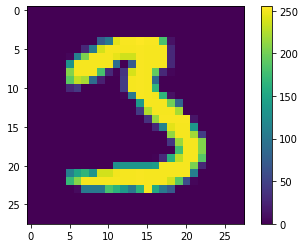

Label: 3


In [ ]:
# Checking if data loaded correctly

plt.figure()
plt.imshow(Xtrain[11111])
plt.colorbar()
plt.show()
print("Label:", Ytrain[11111])

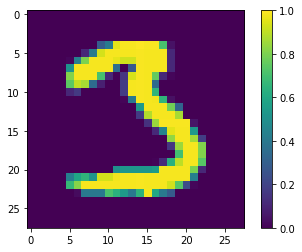

3


In [ ]:
# Preprocessing is required to normalize the range of features from [0, 255] --> [0, 1]

Xtrain = Xtrain.astype("float32") / 255.0
Xtest = Xtest.astype("float32") / 255.0
plt.figure()
plt.imshow(Xtrain[11111])
plt.colorbar()
plt.show()
print(Ytrain[11111])

In [ ]:
# convert the labels from integers to vectors
# [Label = '3']  ---> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
Ytrain = LabelBinarizer().fit_transform(Ytrain)
Ytest = LabelBinarizer().fit_transform(Ytest)

###**`Defining Architecture ANNs`**

In [ ]:
# Model 1: (784 - 10... 10 layers ...10 - 10)
# This model contains 10 hidden layers, each containing 10 neurons

model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
for i in range(10):
    model1.add(Dense(10))
    model1.add(Activation("sigmoid"))
    model1.add(BatchNormalization())
model1.add(Dense(10, activation="sigmoid"))

In [ ]:
# Model 2: (784 - 10... 10 layers ...10 - 10)
# This model contains 10 hidden layers, each containing 10 neurons

model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
for i in range(10):
    model2.add(Dense(10))
    model2.add(Activation("relu"))
    model2.add(BatchNormalization())
model2.add(Dense(10, activation="sigmoid"))

###**`Training ANNs`**

In [ ]:
# Train Model 1 using ADAM Optimizer

eCount = 20
batch_size = 64
model1.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=0.0001), metrics = ["accuracy"])
Hyp1 = model1.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs = eCount, batch_size = batch_size)

Epoch 1/20
938/938 [==============================] - 9s 6ms/step - loss: 1.5256 - accuracy: 0.5137 - val_loss: 1.0429 - val_accuracy: 0.7029
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.9580 - accuracy: 0.7380 - val_loss: 0.7455 - val_accuracy: 0.8040
Epoch 3/20
938/938 [==============================] - 11s 12ms/step - loss: 0.7498 - accuracy: 0.7977 - val_loss: 0.6022 - val_accuracy: 0.8411
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 0.6389 - accuracy: 0.8246 - val_loss: 0.5179 - val_accuracy: 0.8575
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.5687 - accuracy: 0.8408 - val_loss: 0.4624 - val_accuracy: 0.8725
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.5175 - accuracy: 0.8528 - val_loss: 0.4233 - val_accuracy: 0.8786
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 0.4814 - accuracy: 0.8618 - val_loss: 0.3973 - val_accuracy: 0.8853
Epo

In [ ]:
# Train Model 2 using ADAM Optimizer

batch_size = 64
model2.compile(loss = "categorical_crossentropy", optimizer = Adam(learning_rate=0.0001), metrics = ["accuracy"])
Hyp2 = model2.fit(Xtrain, Ytrain, validation_data=(Xtest,Ytest), epochs = eCount, batch_size = batch_size)

Epoch 1/20
938/938 [==============================] - 9s 6ms/step - loss: 2.1783 - accuracy: 0.2485 - val_loss: 1.8481 - val_accuracy: 0.3863
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 1.7249 - accuracy: 0.4246 - val_loss: 1.4776 - val_accuracy: 0.5138
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 1.4195 - accuracy: 0.5350 - val_loss: 1.1987 - val_accuracy: 0.6088
Epoch 4/20
938/938 [==============================] - 5s 6ms/step - loss: 1.1970 - accuracy: 0.6084 - val_loss: 0.9970 - val_accuracy: 0.6700
Epoch 5/20
938/938 [==============================] - 5s 6ms/step - loss: 1.0341 - accuracy: 0.6604 - val_loss: 0.8360 - val_accuracy: 0.7385
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.9060 - accuracy: 0.7105 - val_loss: 0.7425 - val_accuracy: 0.7758
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.8250 - accuracy: 0.7391 - val_loss: 0.6762 - val_accuracy: 0.7909
Epoch 

###**`Evaluating Performance of ANNs on Test Data and Comparision`**

In [ ]:
# evaluating the networks on the testing data to obtain our final classifications

print("Evaluating ANN Model 1 ...")
test_loss1, test_acc1 = model1.evaluate(Xtest,  Ytest)

print("Evaluating ANN Model 2 ...")
test_loss2, test_acc2 = model2.evaluate(Xtest,  Ytest)

print("Accuracy of Model 1 on Testing data: {} %".format(test_acc1*100))
print("Accuracy of Model 2 on Testing data: {} %".format(test_acc2*100))

Evaluating ANN Model 1 ...
313/313 [==============================] - 1s 2ms/step - loss: 0.2449 - accuracy: 0.9264
Evaluating ANN Model 2 ...
313/313 [==============================] - 1s 2ms/step - loss: 0.3807 - accuracy: 0.8980
Accuracy of Model 1 on Testing data: 92.64000058174133 %
Accuracy of Model 2 on Testing data: 89.80000019073486 %


###**`Plotting Training Loss and Accuracy for ANNs`**



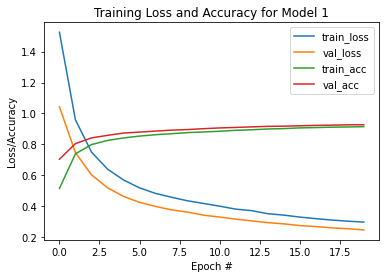

In [ ]:
plt.figure()
plt.plot(np.arange(0, eCount), Hyp1.history["loss"], label="train_loss")
plt.plot(np.arange(0, eCount), Hyp1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, eCount), Hyp1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, eCount), Hyp1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Model 1")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

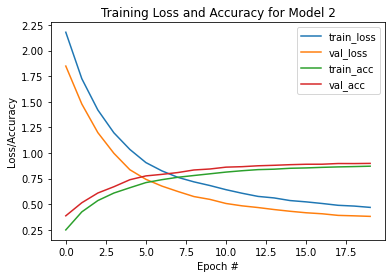

In [ ]:
plt.figure()
plt.plot(np.arange(0, eCount), Hyp2.history["loss"], label="train_loss")
plt.plot(np.arange(0, eCount), Hyp2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, eCount), Hyp2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, eCount), Hyp2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Model 2")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

###**`Summary of Models of ANNs`**

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                      